# Computing & plotting the scale

This notebook attempts to reproduce Thurstone's scale (c.f. page 393 of his paper), using the [`choix` library](https://github.com/lucasmaystre/choix).

In [1]:
import choix
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Load the data.

In [2]:
mat = np.loadtxt("../ccdata-fixed.csv", delimiter=",", dtype=int)

with open("../labels.txt") as f:
    labels = list(line.strip() for line in f)

Estimate the model parameters based on the pairwise-comparison outcomes.

In [3]:
mat = np.transpose(mat)
params = choix.ilsr_pairwise_dense(mat)

In [4]:
pairs = zip(params, labels)
for param, label in sorted(pairs):
    print("{: <22} {:+.3f}".format(label, param))

Vagrancy               -3.415
Receiving stolen goods -1.273
Bootlegging            -1.203
Smuggling              -1.100
Libel                  -1.042
Larceny                -0.670
Assault and battery    -0.389
Burglary               -0.302
Forgery                -0.244
Counterfeiting         -0.115
Perjury                -0.095
Embezzlement           -0.042
Arson                  +0.550
Adultery               +0.734
Kidnapping             +0.831
Seduction              +1.032
Abortion               +1.075
Homicide               +2.751
Rape                   +2.916


Plot the resulting scale.

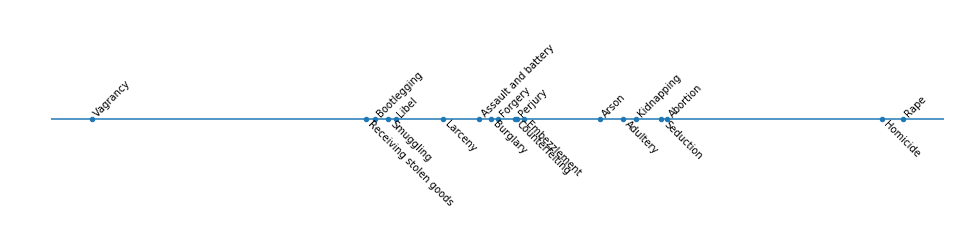

In [5]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.set_axis_off()
ax.scatter(params, np.zeros_like(params), s=20.0)

for i, (x, label) in enumerate(sorted(zip(params, labels))):
    if i % 2 == 0:
        ax.annotate(label, (x, 0), ha="left", va="bottom", rotation=45)
    else:
        ax.annotate(label, (x, 0), ha="left", va="top", rotation=-45)

ax.axhline(0.0)
#fig.savefig("scale.svg")